Problem Description
A Chinese automobile company aspires to enter the US market by setting up their manufacturing
unit there and producing cars locally to give competition to their US and European counterparts.
They have contracted an automobile consulting company to understand the factors on which
the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing
of cars in the American market, since those may be very different from the Chinese market.
Essentially, the company wants to know:
• Which variables are significant in predicting the price of a car
• How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different
types of cars across the American market.
Business Goal
You are required to model the price of cars with the available independent variables. It will be
used by the management to understand how exactly the prices vary with the independent
variables. They can accordingly manipulate the design of the cars, the business strategy etc. to
meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.
Dataset:<a href="https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view" target="_blank" rel="noopener">Data</a>



In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis

In [67]:
df = pd.read_csv('E:\ML\CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

No null values in this dataset.

In [69]:
df[df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


No duplicate values in this dataset.

In [70]:
for i in df.columns:
    print("Name of column : ",i)
    print("Unique values in the column ",i ," :",df[i].unique())
    print("Length of unique values in the column ",i," is " ,len(df[i].unique()))
    print("\n")


Name of column :  car_ID
Unique values in the column  car_ID  : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
Length of unique values in the column  car_ID  is  205


Name of column :  symboling
Unique values in t

Here the dependent variable is 'price'. Before creating model we have to remove the outliers.

In [71]:
df["price"].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

C:\Users\Mathew\AppData\Local\Temp\ipykernel_8620\1688970307.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"],color='r')


<Axes: xlabel='price', ylabel='Density'>

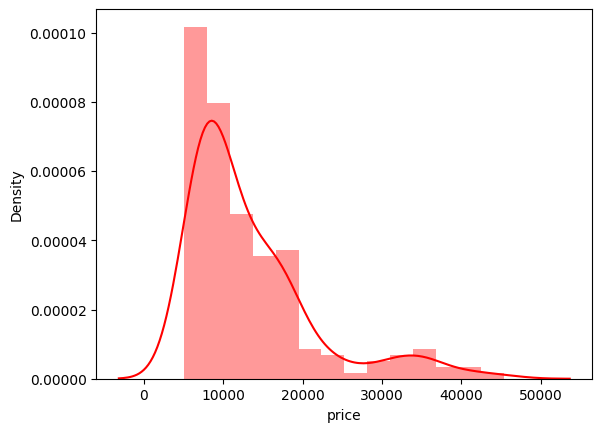

In [72]:
sns.distplot(df["price"],color='r')

C:\Users\Mathew\AppData\Local\Temp\ipykernel_8620\1260701541.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(np.log(np.log(df["price"]))),color='r')


<Axes: xlabel='price', ylabel='Density'>

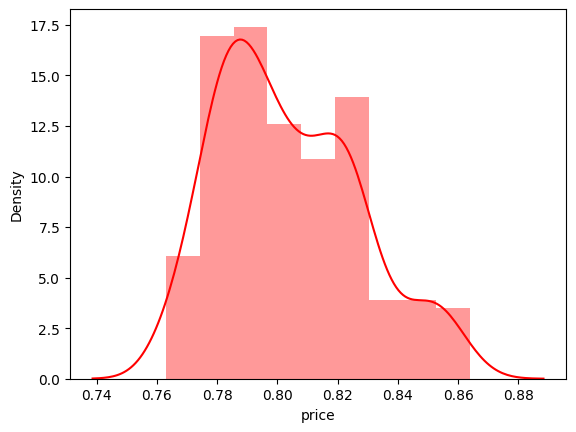

In [73]:
sns.distplot(np.log(np.log(np.log(df["price"]))),color='r')

<Axes: >

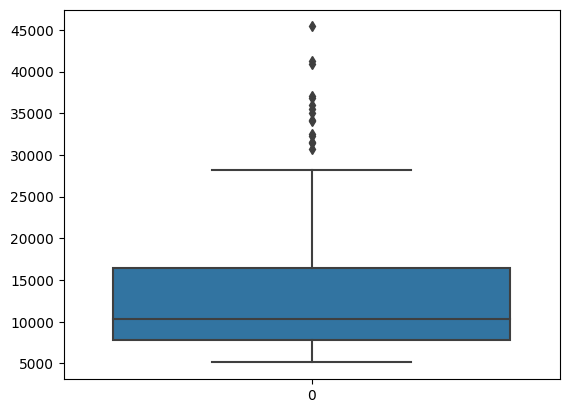

In [74]:
sns.boxplot(df["price"])

<Axes: >

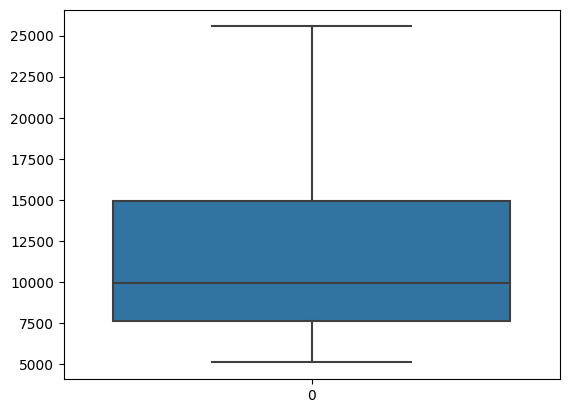

In [75]:
upper_limit = df['price'].quantile(0.921)
lower_limit = df['price'].quantile(0.01)
df_new = df[df['price'] <= upper_limit]
sns.boxplot(new_df['price'])


In [76]:
df_new

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [77]:
for i in df_new.columns:
    print("Name of column : ",i)
    print("Unique values in the column ",i ," :",df_new[i].unique())
    print("Length of unique values in the column ",i," is " ,len(df_new[i].unique()))
    print("\n")

Name of column :  car_ID
Unique values in the column  car_ID  : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205]
Length of unique values in the column  car_ID  is  188


Name of column :  symboling
Unique values in the column  symboling  : [ 3  1  2  0 -1 -2]
Length of unique values i

In [78]:

df_new.drop(columns='enginelocation',inplace=True)

C:\Users\Mathew\AppData\Local\Temp\ipykernel_8620\193231753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(columns='enginelocation',inplace=True)


In [79]:
df_new.price.describe()

count      188.000000
mean     11331.713654
std       4683.373818
min       5118.000000
25%       7669.000000
50%       9927.000000
75%      14911.750000
max      25552.000000
Name: price, dtype: float64

# Encoding

In [80]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in df_new[["CarName","fueltype","aspiration","doornumber","carbody","drivewheel","fuelsystem","enginetype","cylindernumber"]]:
    df_new[i] = label_encoder.fit_transform(df_new[i])
df_new

C:\Users\Mathew\AppData\Local\Temp\ipykernel_8620\1740457714.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[i] = label_encoder.fit_transform(df_new[i])
C:\Users\Mathew\AppData\Local\Temp\ipykernel_8620\1740457714.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[i] = label_encoder.fit_transform(df_new[i])
C:\Users\Mathew\AppData\Local\Temp\ipykernel_8620\1740457714.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,124,1,0,0,3,2,109.1,188.8,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,123,1,1,0,3,2,109.1,188.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,125,1,0,0,3,2,109.1,188.8,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,127,0,1,0,3,2,109.1,188.8,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


# Finding Correlated columns

In [81]:
corr_columns=[]
for i in df_new.columns:
    corr2=df_new[[i,'price']].corr()
    print(i,corr2.iloc[0][1].round(1))
    if abs(corr2.iloc[0][1])>0.5:
         corr_columns.append(i)
print("Correlated columns : ",corr_columns)
df_corr=df_new[corr_columns]
df_corr

car_ID 0.0
symboling -0.1
CarName -0.0
fueltype -0.1
aspiration 0.4
doornumber -0.2
carbody 0.1
drivewheel 0.5
wheelbase 0.7
carlength 0.7
carwidth 0.8
carheight 0.2
curbweight 0.8
enginetype -0.1
cylindernumber 0.1
enginesize 0.7
fuelsystem 0.6
boreratio 0.5
stroke 0.0
compressionratio 0.1
horsepower 0.7
peakrpm -0.1
citympg -0.7
highwaympg -0.7
price 1.0
Correlated columns :  ['drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'fuelsystem', 'horsepower', 'citympg', 'highwaympg', 'price']


,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,horsepower,citympg,highwaympg,price
0,2,88.6,168.8,64.1,2548,130,5,111,21,27,13495.0
1,2,88.6,168.8,64.1,2548,130,5,111,21,27,16500.0
2,2,94.5,171.2,65.5,2823,152,5,154,19,26,16500.0
3,1,99.8,176.6,66.2,2337,109,5,102,24,30,13950.0
4,0,99.4,176.6,66.4,2824,136,5,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...
200,2,109.1,188.8,68.9,2952,141,5,114,23,28,16845.0
201,2,109.1,188.8,68.8,3049,141,5,160,19,25,19045.0
202,2,109.1,188.8,68.9,3012,173,5,134,18,23,21485.0
203,2,109.1,188.8,68.9,3217,145,3,106,26,27,22470.0


# Scaling

In [82]:
from sklearn.preprocessing import MinMaxScaler


# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df_corr)

# Transform the data
scaled_data = scaler.transform(df_corr)

# Print the scaled data
print(scaled_data.round(2))
df_corr[corr_columns]=scaled_data.round(2)
df_corr

[[1.   0.07 0.48 ... 0.15 0.21 0.41]
 [1.   0.07 0.48 ... 0.15 0.21 0.56]
 [1.   0.29 0.52 ... 0.09 0.18 0.56]
 ...
 [1.   0.82 0.83 ... 0.06 0.09 0.8 ]
 [1.   0.82 0.83 ... 0.3  0.21 0.85]
 [1.   0.82 0.83 ... 0.09 0.15 0.86]]


C:\Users\Mathew\AppData\Local\Temp\ipykernel_8620\3778447391.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[corr_columns]=scaled_data.round(2)


,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,horsepower,citympg,highwaympg,price
0,1.0,0.07,0.48,0.34,0.52,0.57,0.71,0.41,0.15,0.21,0.41
1,1.0,0.07,0.48,0.34,0.52,0.57,0.71,0.41,0.15,0.21,0.56
2,1.0,0.29,0.52,0.47,0.66,0.75,0.71,0.70,0.09,0.18,0.56
3,0.5,0.48,0.61,0.53,0.42,0.39,0.71,0.36,0.24,0.29,0.43
4,0.0,0.46,0.61,0.55,0.66,0.61,0.71,0.44,0.06,0.06,0.60
...,...,...,...,...,...,...,...,...,...,...,...
200,1.0,0.82,0.83,0.77,0.72,0.66,0.71,0.43,0.21,0.24,0.57
201,1.0,0.82,0.83,0.77,0.77,0.66,0.71,0.74,0.09,0.15,0.68
202,1.0,0.82,0.83,0.77,0.75,0.92,0.71,0.57,0.06,0.09,0.80
203,1.0,0.82,0.83,0.77,0.85,0.69,0.43,0.38,0.30,0.21,0.85


# Linear Regression

# 1. Provide data

Here we are assigning indepentent variable to 'X' and depenedent variable to 'Y'. Then we are spliting the dataset into two- train data and test data. 80% of data into train dataset and 20% data into test dataset.

In [83]:
features = ['drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'fuelsystem', 'horsepower', 'citympg', 'highwaympg']
X = df_corr[features]
Y = df_corr['price']
x_train,x_test,y_train,y_test,=train_test_split(X,Y,train_size=0.80)



The next step is to create a linear regression model and fit it using the existing data. With fit(), you calculate the optimal values of the weights 𝑏₀ and 𝑏₁, using the existing input and output, x and y, as the arguments. In other words, .fit() fits the model.

# 2. Create a model and fit it

In [97]:
reg=LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

# 3. Get results

Once you have your model fitted, you can get the results to check whether the model works satisfactorily and to interpret it.

You can obtain the coefficient of determination, 𝑅², with .score() called on model:

The coefficient of determination is the square of the correlation(r), thus it ranges from 0 to 1.
With linear regression, the coefficient of determination is equal to the square of the correlation between the x and y variables.
If R2 is equal to 0, then the dependent variable cannot be predicted from the independent variable.
If R2 is equal to 1, then the dependent variable can be predicted from the independent variable without any error.
If R2 is between 0 and 1, then it indicates the extent that the dependent variable can be predictable.

In [106]:
reg.score(x_test,y_test)

0.8317853995687502

In [107]:
mse=mean_squared_error(y_test,pred)
mse

0.010669150822878693

In [108]:
np.sqrt(mse)

0.10329158156828994

# 4. Predict response

In [110]:
pred=reg.predict(x_test)
print(f"Predicted response:\n{pred}")

Predicted response:
[0.0485918  0.71672741 0.64133326 0.13408642 0.17831782 0.38201071
 0.0763261  0.34506056 0.07979813 0.41441448 0.16065578 0.71649532
 0.76260567 0.09656161 0.13433665 0.45717675 0.63522708 0.63484875
 0.54671749 0.24380444 0.08183429 0.29886767 0.06251465 0.18344309
 0.07608074 0.10225133 0.56213409 0.10088973 0.48869802 0.53090037
 0.63650543 0.22429765 0.16836559 0.39497332 0.05421575 0.30408966
 0.09793045 0.63975665]


In [111]:
x_test

,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,horsepower,citympg,highwaympg
50,0.5,0.24,0.31,0.35,0.20,0.25,0.14,0.13,0.42,0.32
105,1.0,0.17,0.51,0.68,0.81,0.98,0.71,1.00,0.03,0.09
198,1.0,0.64,0.83,0.62,0.77,0.57,0.71,0.75,0.03,0.06
162,0.5,0.33,0.44,0.37,0.32,0.30,0.14,0.14,0.36,0.41
163,1.0,0.29,0.48,0.33,0.34,0.30,0.14,0.14,0.39,0.41
133,0.5,0.45,0.79,0.56,0.60,0.49,0.71,0.41,0.15,0.24
22,0.5,0.26,0.28,0.32,0.19,0.24,0.14,0.13,0.45,0.53
56,1.0,0.32,0.48,0.49,0.44,0.07,0.29,0.35,0.03,0.09
96,0.5,0.29,0.42,0.32,0.24,0.30,0.14,0.14,0.45,0.50
167,1.0,0.43,0.61,0.48,0.52,0.70,0.71,0.45,0.24,0.29


In [112]:
y_test

50     0.00
105    0.71
198    0.65
162    0.20
163    0.14
133    0.35
22     0.06
56     0.33
96     0.12
167    0.16
159    0.13
201    0.68
67     1.00
138    0.00
157    0.10
29     0.38
109    0.36
110    0.43
101    0.41
86     0.15
51     0.05
173    0.19
89     0.02
142    0.13
53     0.08
25     0.08
6      0.62
35     0.11
136    0.64
9      0.62
104    0.59
27     0.17
141    0.10
135    0.51
21     0.02
3      0.43
120    0.05
181    0.52
Name: price, dtype: float64

In [113]:
reg.coef_

array([ 0.13123179,  0.16231203, -0.1439705 ,  0.29044193,  0.43208706,
        0.0039415 ,  0.03853575,  0.25462279, -0.20524187,  0.18761784])

In [114]:
reg.intercept_

-0.21273767956791023

In [115]:
linear_equ=reg.intercept_
for i in range(0,10):
    linear_equ+=reg.coef_[i]*x_test.iloc[37][i]
linear_equ

0.6397566496737155

In [123]:
print("Independent values X :\n",x_test.iloc[37])
print("Dependent value Y :",y_test.iloc[37])
print(" Predicted value by the model :",reg.predict([x_test.iloc[37]]))

Independent values X :
 drivewheel    1.00
wheelbase     0.65
carlength     0.81
carwidth      0.56
curbweight    0.82
enginesize    0.82
fuelsystem    0.71
horsepower    0.71
citympg       0.09
highwaympg    0.12
Name: 181, dtype: float64
Dependent value Y : 0.52
 Predicted value by the model : [0.63975665]


C:\Users\Mathew\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
